### Import Necessary Modules

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud 

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\misyel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\misyel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\misyel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Loading The Dataset

In [68]:
columns = ["id", "topic", "label", "text"]

# Load taining and validation dataset
df_train = pd.read_csv('../data/twitter_training.csv', names = columns, encoding='ISO-8859-1')
df_val = pd.read_csv('../data/twitter_validation.csv', names = columns, encoding='ISO-8859-1')

# Concatenate data
df = pd.concat([df_train, df_val], ignore_index=True)
df.head()

,id,topic,label,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [69]:
df.shape

(75682, 4)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      75682 non-null  int64 
 1   topic   75682 non-null  object
 2   label   75682 non-null  object
 3   text    74996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [71]:
df.label.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [72]:
df.isna().sum()

id         0
topic      0
label      0
text     686
dtype: int64

In [73]:
df = df.dropna()
df.isna().sum()

id       0
topic    0
label    0
text     0
dtype: int64

In [74]:
# Show count of each label
label_value_counts = df['label'].value_counts()
label_value_counts

label
Negative      22624
Positive      20932
Neutral       18393
Irrelevant    13047
Name: count, dtype: int64

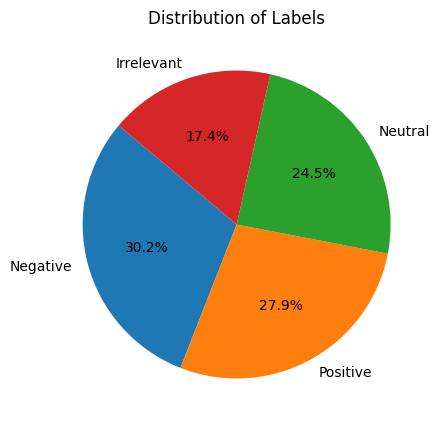

In [75]:
#  Plot pie chart to show proportions of label
plt.figure(figsize=(5, 5))
plt.pie(label_value_counts, labels=label_value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Labels')
plt.show()

### Data Preprocessing

- lowercase
- remove URLs, mentions, hashtags, numbers, punctuations, and other non-word characters
- strip leading and trailing whitespace

In [76]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define stop words
stop_words = set(stopwords.words('english'))

# Add custom stop words
custom_stopwords = ['â']
stop_words.update(custom_stopwords)

# Preprocessing function
def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Remove URLs, mentions, hashtags, numbers, punctuations, and other non-word characters (special characters)
    text = re.sub(r'http\S+|www\S+|https\S+|@\S+|#\S+|\d+|[^\w\s]', '', text, flags=re.MULTILINE)

    # Strip leading and trailing whitespace
    text = text.strip()
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stop words and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    # Join tokens back to string
    processed_text = ' '.join(tokens)
    
    # Check if the processed text is empty or contains only whitespace
    if processed_text.strip() == '':
        return None
    
    return processed_text

# Apply the preprocessing function to the text column
df['text'] = df['text'].apply(preprocess_text)

In [77]:
df['text'].head(13)

0                          im getting borderland murder
1                                    coming border kill
2                            im getting borderland kill
3                           im coming borderland murder
4                          im getting borderland murder
5                          im getting borderland murder
6     spent hour making something fun dont know huge...
7     spent couple hour something fun dont know im h...
8     spent hour something fun dont know im huge bor...
9     spent hour making something fun dont know huge...
10    spent hour making something fun dont know huge...
11                                                 None
12    rockhard la varlope rare powerful handsome jac...
Name: text, dtype: object

In [78]:
df.isna().sum()

id          0
topic       0
label       0
text     1696
dtype: int64

In [79]:
df = df.dropna(subset=['text'])
df.reset_index(drop=True, inplace=True)
df.head(13)

,id,topic,label,text
0,2401,Borderlands,Positive,im getting borderland murder
1,2401,Borderlands,Positive,coming border kill
2,2401,Borderlands,Positive,im getting borderland kill
3,2401,Borderlands,Positive,im coming borderland murder
4,2401,Borderlands,Positive,im getting borderland murder
5,2401,Borderlands,Positive,im getting borderland murder
6,2402,Borderlands,Positive,spent hour making something fun dont know huge...
7,2402,Borderlands,Positive,spent couple hour something fun dont know im h...
8,2402,Borderlands,Positive,spent hour something fun dont know im huge bor...
9,2402,Borderlands,Positive,spent hour making something fun dont know huge...


In [80]:
df.isna().sum()

id       0
topic    0
label    0
text     0
dtype: int64

### Exploratory Data Analysis

Which words appear the most per positive, negative, and neutral tweets?

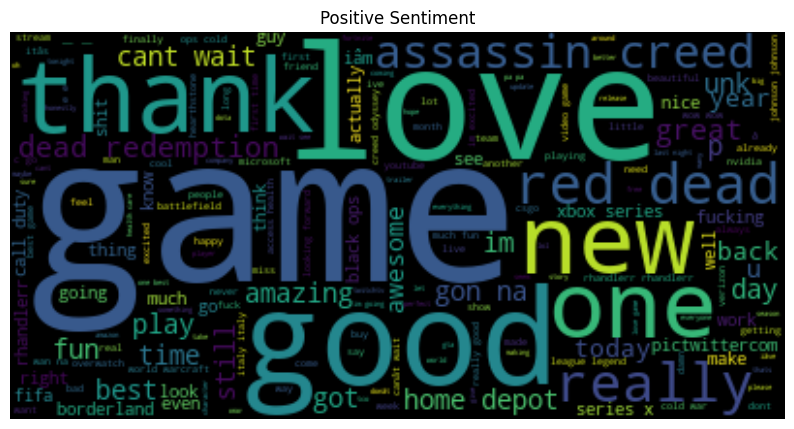

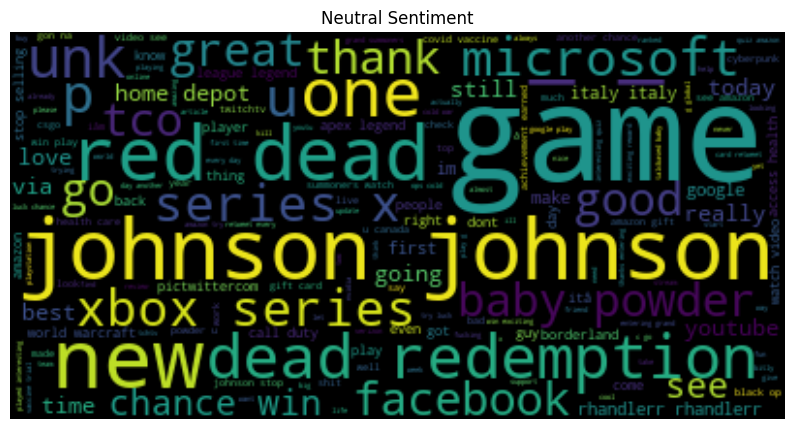

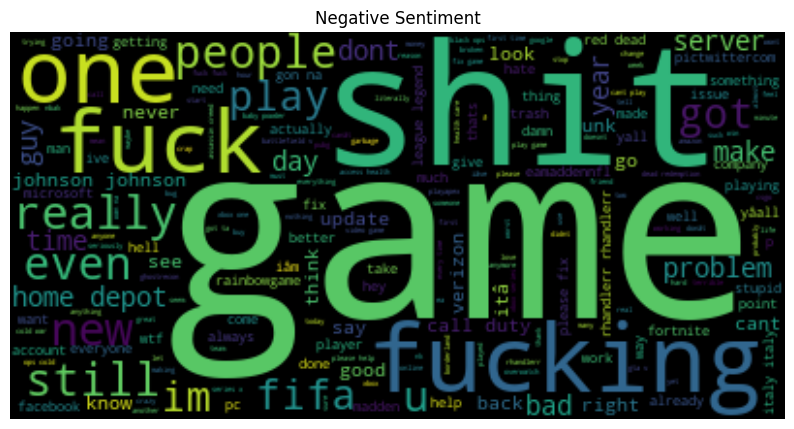

In [81]:
# Function to generate and display word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(background_color='black').generate(text)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Filter and concatenate text for positive, neutral, and negative labels
positive_text = ' '.join(df[df['label'] == 'Positive']['text'].dropna().astype(str).tolist())
neutral_text = ' '.join(df[df['label'] == 'Neutral']['text'].dropna().astype(str).tolist())
negative_text = ' '.join(df[df['label'] == 'Negative']['text'].dropna().astype(str).tolist())

# Generate and display word clouds
generate_word_cloud(positive_text, 'Positive Sentiment')
generate_word_cloud(neutral_text, 'Neutral Sentiment')
generate_word_cloud(negative_text, 'Negative Sentiment')

Which topics have more Tweets?

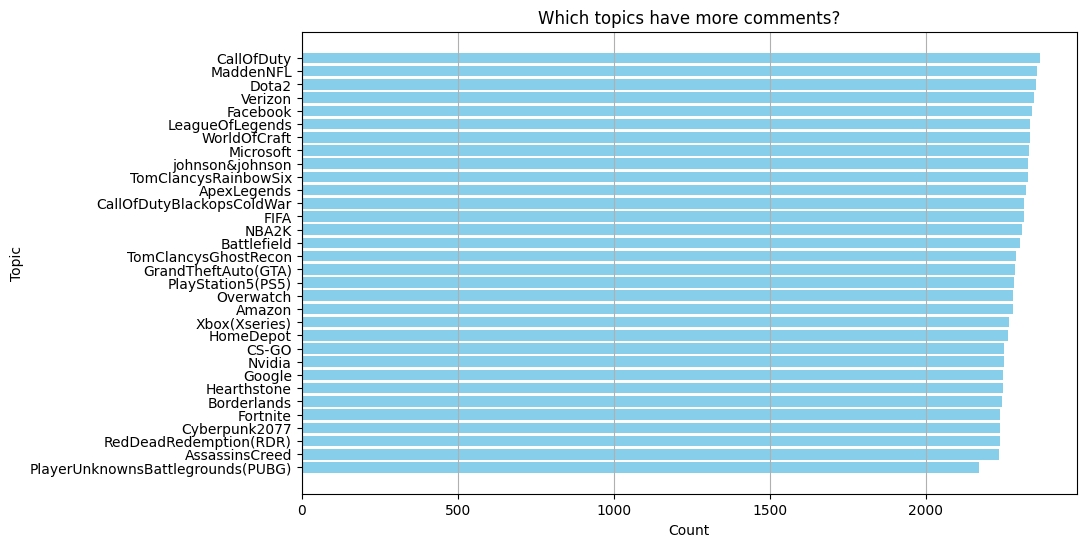

In [82]:
topic_value_counts = df["topic"].value_counts().reset_index()
topic_value_counts.columns = ['topic', 'count']
topic_value_counts = topic_value_counts.sort_values(by='count', ascending=True)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.barh(topic_value_counts['topic'], topic_value_counts['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Topic')
plt.title('Which topics have more comments?')
plt.grid(axis='x')
plt.show()

Which topics have the most positive, negative, and neutral tweets?

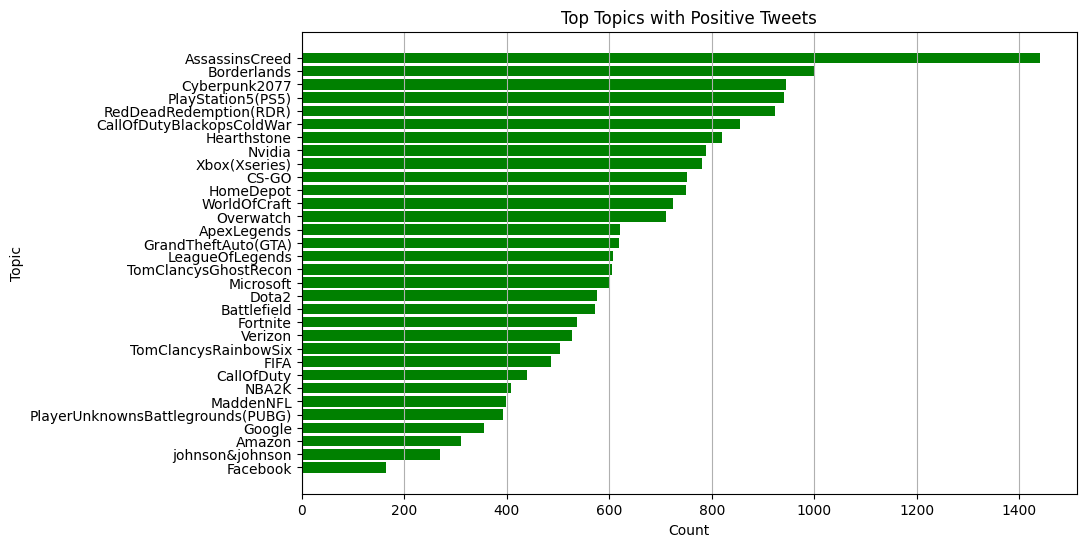

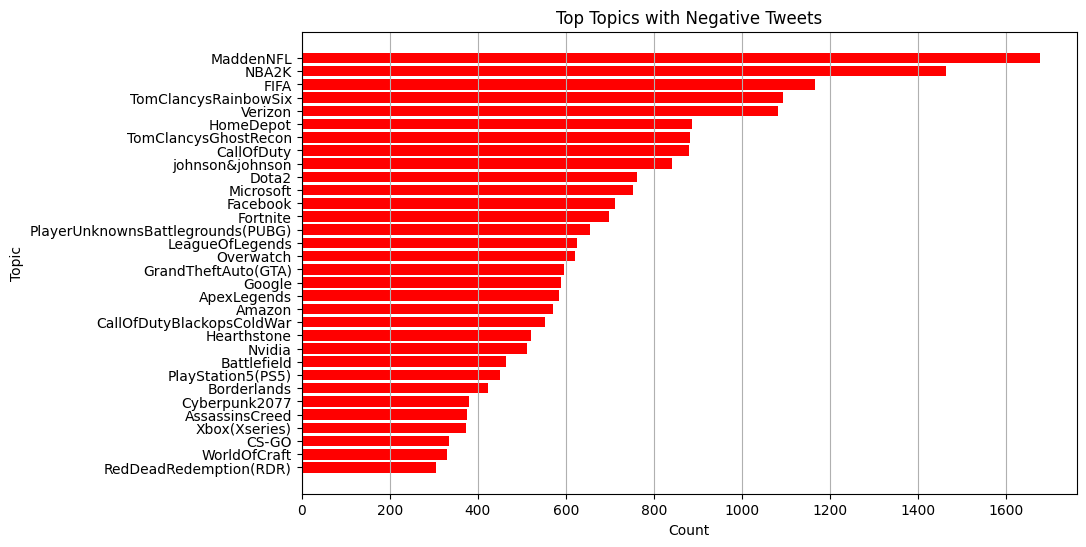

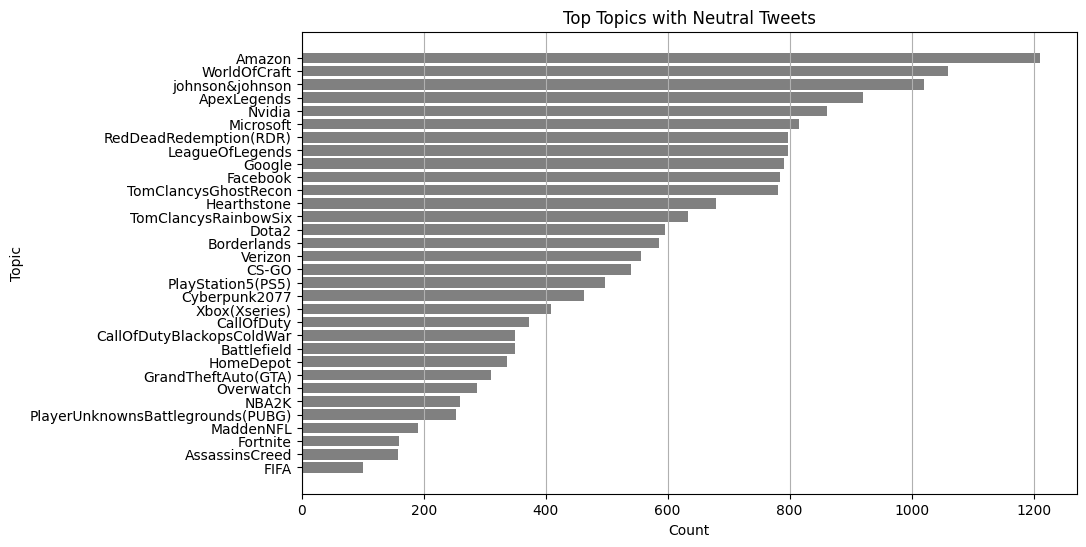

In [83]:
def plot_sentiment_topics(df, sentiment_label):
    # Group by topic and label, and count the occurrences
    df_count = df.groupby(['topic', 'label']).size().reset_index(name='count')

    # Filter rows where label matches the specified sentiment_label
    df_filtered = df_count[df_count['label'] == sentiment_label]

    # Sort the df by count
    df_filtered = df_filtered.sort_values(by='count', ascending=True)

    # Define colors based on sentiment
    colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'grey'}

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    plt.barh(df_filtered['topic'], df_filtered['count'], color=colors[sentiment_label])
    plt.xlabel('Count')
    plt.ylabel('Topic')
    plt.title(f'Top Topics with {sentiment_label} Tweets')
    plt.grid(axis='x')
    plt.show()

# Call the function for each sentiment label
plot_sentiment_topics(df, 'Positive')
plot_sentiment_topics(df, 'Negative')
plot_sentiment_topics(df, 'Neutral')


### Label Encoding